In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [5]:
df=pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
num_features=X.select_dtypes(exclude='O').columns
categorical_features=X.select_dtypes(include='O').columns

In [15]:
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,num_features)
    ],remainder='passthrough'
)


In [18]:
X=preprocessor.fit_transform(X)

In [20]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 14))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 14), (200, 14), (800,), (200,))

In [25]:
## Create an evaluate function to give all metrics after model training

def evaluate_model(true,pred):
    r2_sc=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    return r2_sc,mae,rmse

In [31]:
model_list=[]
r2_list=[]
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTree':DecisionTreeRegressor(),
    'KNeighbors':KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'XGBRegressor':XGBRegressor()
}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    r2_score_train,mae_train,rmse_train=evaluate_model(y_train,y_train_pred)
    r2_score_test,mae_test,rmse_test=evaluate_model(y_test,y_test_pred)
    
    model_list.append(list(models.keys())[i])
    r2_list.append(r2_score_test)
    
    print('\n----------Training--------------\n')
    print(f'------------{list(models.keys())[i]}---------------')
    print('r2_score: {:2f}'.format(r2_score_train))
    print('mean absolute error: {:2f}'.format(mae_train))
    print('mean_squared_error: {:2f}'.format(rmse_train))
    
    print('\n----------Test--------------\n')
    print(f'------------{list(models.keys())[i]}---------------')
    print('r2_score: {:2f}'.format(r2_score_test))
    print('mean absolute error: {:2f}'.format(mae_test))
    print('mean_squared_error: {:2f}'.format(rmse_test))
    


----------Training--------------

------------LinearRegression---------------
r2_score: 0.874317
mean absolute error: 4.266712
mean_squared_error: 5.323051

----------Test--------------

------------LinearRegression---------------
r2_score: 0.880433
mean absolute error: 4.214763
mean_squared_error: 5.393994

----------Training--------------

------------Ridge---------------
r2_score: 0.874296
mean absolute error: 4.264992
mean_squared_error: 5.323503

----------Test--------------

------------Ridge---------------
r2_score: 0.880451
mean absolute error: 4.212515
mean_squared_error: 5.393586

----------Training--------------

------------Lasso---------------
r2_score: 0.807146
mean absolute error: 5.206303
mean_squared_error: 6.593816

----------Test--------------

------------Lasso---------------
r2_score: 0.825320
mean absolute error: 5.157882
mean_squared_error: 6.519695

----------Training--------------

------------DecisionTree---------------
r2_score: 0.999653
mean absolute error:

In [32]:
model_list

['LinearRegression',
 'Ridge',
 'Lasso',
 'DecisionTree',
 'KNeighbors',
 'RandomForestRegressor',
 'AdaBoostRegressor',
 'CatBoostRegressor',
 'XGBRegressor']

In [33]:
r2_list

[0.8804332983749564,
 0.8804513937125635,
 0.8253197323627852,
 0.7338891025830695,
 0.7763353420586311,
 0.8519681584341212,
 0.8485660871752485,
 0.8498011432081655,
 0.8250455856323242]

In [36]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,Model Name,r2_score
1,Ridge,0.880451
0,LinearRegression,0.880433
5,RandomForestRegressor,0.851968
7,CatBoostRegressor,0.849801
6,AdaBoostRegressor,0.848566
2,Lasso,0.825320
8,XGBRegressor,0.825046
4,KNeighbors,0.776335
3,DecisionTree,0.733889


In [38]:
## Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Y pred')

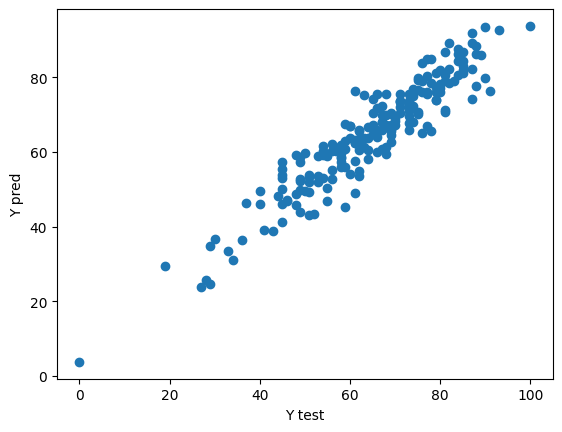

In [39]:
## Plot y_pred vs y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')